In [2]:
import os
import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
from model import Net
from util import pil_to_model_tensor_transform
import consts

# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

# User constants

dset_path = os.path.join('.', 'data', 'UTKFace', 'unlabeled')
tempdir = gettempdir()

In [4]:
consts.NUM_Z_CHANNELS = 50  # we have two trained models, with 50 and 100
net = Net()
load_path = {50: r"./trained_models/2021_03_06/19_47/epoch150/"}[consts.NUM_Z_CHANNELS]
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

[12:33] Loaded E, G from ./trained_models/2021_03_06/19_47/epoch150/


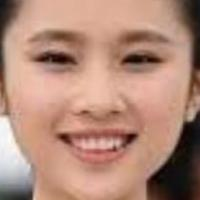

In [56]:
# Game 3: Kids
# Set the attributes of the first random person you want to test
age_1 = 20
gender_1 = FEMALE
race_1 = ASIAN

image_path_1 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_1, g=gender_1, r=race_1))))
Image(filename=image_path_1)  # Will select and show a person with the attributes you selected

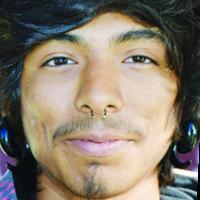

In [75]:
# Game 3: Kids
# Set the attributes of the second random person you want to test
age_2 = 22
gender_2 = MALE
race_2 = OTHER

image_path_2 = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age_2, g=gender_2, r=race_2))))
Image(filename=image_path_2)  # Will select and show a person with the attributes you selected

[19:08] Saved test result to /var/folders/tk/_5gn0_kn3fs2j9z4nq_n9xw00000gn/T/kids.png


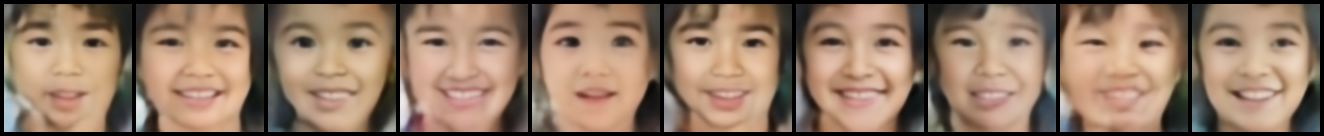

In [76]:
image_tensor_1 = pil_to_model_tensor_transform(pil_loader(image_path_1))
image_tensor_2 = pil_to_model_tensor_transform(pil_loader(image_path_2))
Image(filename=net.kids(image_tensors=(image_tensor_1, image_tensor_2), length=10, target=tempdir))